# Inversão de dados com ruídos de baixa amplitude

Este experiemento serve para avaliar o desempenho das funções objetivos generalizadas de Rényi, Tsallis e de Kaniadakis nos limites em que elas estão relacionadas a uma distribuição de probabilidades semelhante a uma função DElta de Dirac.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
from math import gamma

plt.style.use('seaborn-paper')

In [3]:
## função objetivo clássica
def phi(modelo, yn):
    ycalc= modelo_linear(modelo)
    erro = yn - ycalc    
    return 0.5*np.sum(erro**2)

In [4]:
numPontos = 50          # numero de pontos
x = np.linspace(-1,1,numPontos)
media, desvio = 0, 0.1 # média e desvio padrão do erro gaussiano

In [5]:
## modelo linear
def modelo_linear(modelo):
  X = np.linspace(-1,1,numPontos)
  A = np.array([X, np.ones(X.size)]).T
  x = np.array([modelo[0], modelo[1]])
  return np.dot(A, x)

In [6]:
## dado observado sem outlier
d = modelo_linear([1,2])

## dado observado com ruido gaussiano
dg = d + np.random.normal(media, desvio, d.shape) 

In [7]:
## Dado observado para o experimento sem outliers
dexp1 = dg

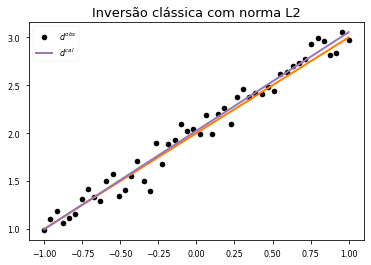

In [8]:
res = minimize(phi, x0=[0,0], args=(dexp1), method='CG', tol=1e-6)
dcalExp1 = modelo_linear(res.x)

fig, ax = plt.subplots()
ax.plot(x, dg, 'o', c='black', label=r'$d^{obs}$')
#ax.plot(x[35:45], dexp1[35:45], 'o', c='red', label='outliers')
ax.plot(x, modelo_linear([1,2]), color='#FF7E00', lw=2)
ax.plot(x, dcalExp1, label=r'$d^{cal}$', color='#9a76b6', lw=2)
ax.set_title('Inversão clássica com norma L2', fontsize=13)
ax.legend()

In [9]:
## Funções objetivos generalizadas
beta = lambda k: 1/abs(2*k)*(1+abs(k)/2)/(2+3*abs(k))*gamma(1/abs(2*k)-3/4)\
    /gamma(1/abs(2*k)+3/4)*gamma(1/abs(2*k)+1/4)/gamma(1/abs(2*k)-1/4)

def phigen(modelo, yn, estatistica, q):
    ycalc= modelo_linear(modelo)
    erro = yn - ycalc

    if q == 0 or q == 1:
      phigen = 0.5*np.sum(erro**2)

    else:
      if estatistica == 'Renyi':
        phigen = ( 1/(1-q) ) * np.sum( np.log( 1 - ( (q-1)/(3*q-1) )*(erro**2) ) )
      elif estatistica == 'Tsallis':
        phigen = ( 1/(q-1) ) * np.sum( np.log( 1 + ( (q-1)/(3-q) )*(erro**2) ) )
      else:
        b = beta(q)
        phigen = ( -1/q ) * np.sum( np.log( np.sqrt(1 + (b**2)*(q**2)*(erro**4) ) - q*b*(erro**2) ) )

    return phigen

In [34]:
#mydrive = '/content/drive/MyDrive/dissertaçao/experimentos/Estimar parametros da reta/'

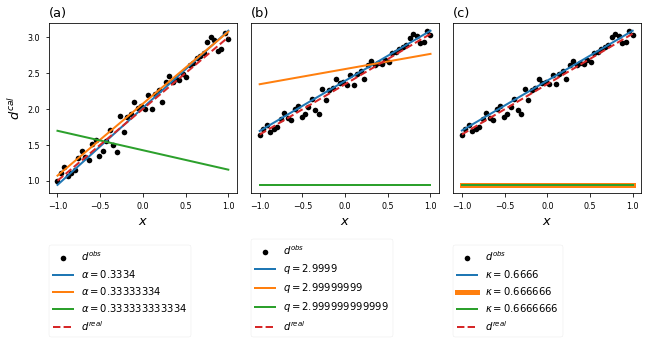

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3.5), tight_layout=True)

lab = ['(a)', '(b)', '(c)']

for i in range(3):
  ax[i].plot(x, dg, 'o', c='black', label=r'$d^{obs}$')
  ax[i].set_title(lab[i], fontsize=13, loc='left')

alpha = [0.3334, 0.33333334, 0.333333333334]
Q = [2.9999, 2.99999999, 2.999999999999]
kappa = [0.6666, 0.666666, 0.6666666]

for a,q in zip(alpha, Q):

  res = minimize(phigen, x0=[0,0], args=(dexp1, 'Renyi', a), method='CG', tol=1e-6)
  ax[0].plot(x, modelo_linear(res.x), label=r'$\alpha = {}$'.format(a), lw=2)

  res = minimize(phigen, x0=[0,0], args=(dexp1, 'Tsallis', q), method='CG', tol=1e-6)
  ax[1].plot(x, modelo_linear(res.x), label=r'$q = {}$'.format(q), lw=2)

k = kappa[0]
res = minimize(phigen, x0=[0,0], args=(dexp1, 'Kaniadakis', k), method='CG', tol=1e-6)
ax[2].plot(x, modelo_linear(res.x), label=r'$\kappa = {}$'.format(k), lw=2)

k = kappa[1]
res = minimize(phigen, x0=[0,0], args=(dexp1, 'Kaniadakis', k), method='CG', tol=1e-6)
ax[2].plot(x, modelo_linear(res.x), label=r'$\kappa = {}$'.format(k), lw=5)

k = kappa[2]
res = minimize(phigen, x0=[0,0], args=(dexp1, 'Kaniadakis', k), method='CG', tol=1e-6)
ax[2].plot(x, modelo_linear(res.x), label=r'$\kappa = {}$'.format(k), lw=2)

ax[0].set_ylabel(r'$d^{cal}$', fontsize=13)
for i in range(3):
  ax[i].set_xlabel(r'$x$', fontsize=13)
  ax[i].plot(x, modelo_linear([1,2]), '--', label=r'$d^{real}$', lw=2)
  ax[i].legend(ncol=1, loc=(0,-0.85), fontsize=10)

for i in range(1,3):
  ax[i].set_ylabel('')
  ax[i].set_yticks([])

#fig.savefig(mydrive+'exp_reta_semOutlies.pdf', bbox_inches='tight')